In [1]:
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Global parameters for the figure.
plt.style.use('seaborn-deep')
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amssymb}'

plt.rcParams["figure.figsize"] = 11.7, 8.3
plt.rcParams["figure.dpi"] = 75

plt.rcParams["font.size"] = 36
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Fira Sans", 'PT Sans', 'Open Sans', 'Roboto', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.fontsize"] = "small"

plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["lines.markersize"] = 18
plt.rcParams["lines.markeredgewidth"] = 3

plt.rcParams["xtick.major.size"] = 8
plt.rcParams["ytick.major.size"] = 8

In [2]:
networks = ['polblogs_beta1p25_00',            'cintestinalis_beta2p00_00',      'foodweb_little_rock_beta1p50_00', 'fao_trade_beta1p75_00',                   'advogato_00',
            'email_company_beta1p50_00',       'sp_high_school_diaries_00',      'us_agencies_washington_00',       'residence_hall_00']
names = ['political blogs', 'tadpole larva brain (C. intestinalis)', 'Little Rock Lake food web', 'FAO trade network', 'Advogato trust network', 'manufacturing company email', 'primary school contacts', 'U.S. government agency websites', 'friendship network']

In [3]:
filename = '../../directedS1_data/real_networks/network_properties/all_gprop.txt'
header = open(filename, 'r').readline().replace('#', ' ').split()
df = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

markers = cycle(('X', '^', 'D', 'H', 'o', 'p', '>', 'h', 'P', 'v', 's', '<'))
colorMap = dict(zip(networks, sns.color_palette('deep', int(len(networks)))))
markerMap = dict(zip(networks, markers))

recip_real = {network: [] for network in networks}
clust_real = {network: [] for network in networks}
nbtri_real = {network: [] for network in networks}

recip_synth = {network: [] for network in networks}
clust_synth = {network: [] for network in networks}
nbtri_synth = {network: [] for network in networks}

for network in networks:
    
    networkName = network.split('_00')[0].split('_beta')[0]
    
    filename = '../../directedS1_data/synthetic_networks/network_properties/' + network + '_gprop.txt'
    header = open(filename, 'r').readline().replace('#', ' ').split()
    synth_prop = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
    # print(network, len(synth_prop))

    recip_synth[network].extend(synth_prop['reciprocity_ratio'])
    clust_synth[network].extend(synth_prop['avg_undir_loc_clust'])
    nbtri_synth[network].extend(synth_prop['nb_triangles'])

    recip_real[network].append(float(df.loc[networkName]['reciprocity_ratio']))
    clust_real[network].append(float(df.loc[networkName]['avg_undir_loc_clust']))
    nbtri_real[network].append(int(df.loc[networkName]['nb_triangles']))

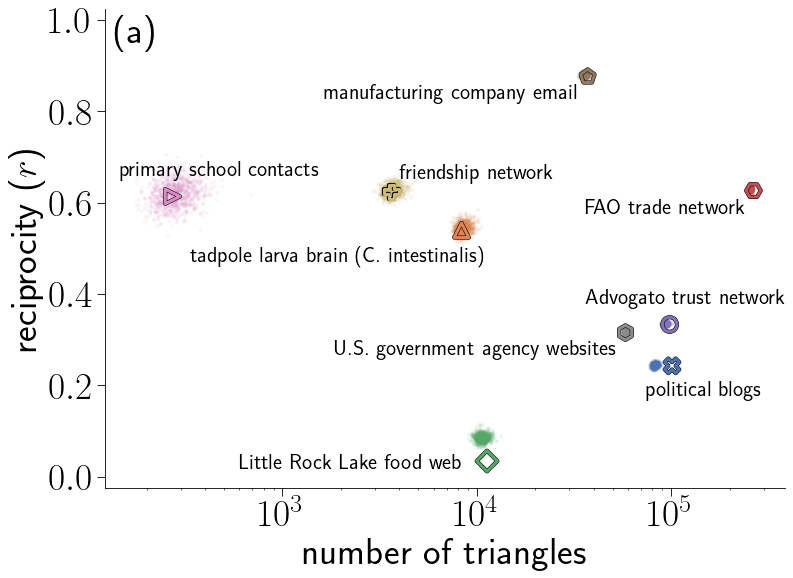

In [10]:
fig, ax = plt.subplots()

kwargs = {'political blogs': {'ha': 'center', 'va': 'top'},
          'tadpole larva brain (C. intestinalis)': {'ha': 'right', 'va': 'top'},
          'Little Rock Lake food web': {'ha': 'right', 'va': 'top'},
          'FAO trade network': {'ha': 'right', 'va': 'top'},
          'Advogato trust network': {'ha': 'center', 'va': 'bottom'},
          'manufacturing company email': {'ha': 'right', 'va': 'top'},
          'primary school contacts': {'ha': 'center', 'va': 'bottom'},
          'U.S. government agency websites': {'ha': 'right', 'va': 'top'},
          'friendship network': {'ha': 'left', 'va': 'bottom'}}

offset_x, offset_y = 8, 8
offset = {'political blogs': {'x': 4*offset_x, 'y': -2*offset_y},
          'tadpole larva brain (C. intestinalis)': {'x': 3*offset_x, 'y': -2*offset_y},
          'Little Rock Lake food web': {'x': -3*offset_x, 'y': offset_y},
          'FAO trade network': {'x': -offset_x, 'y': -offset_y},
          'Advogato trust network': {'x': 2*offset_x, 'y': 2*offset_y},
          'manufacturing company email': {'x': -offset_x, 'y': -offset_y},
          'primary school contacts': {'x': 6*offset_x, 'y': 2*offset_y},
          'U.S. government agency websites': {'x': -offset_x, 'y': -offset_y},
          'friendship network': {'x': offset_x, 'y': offset_y}}

for network, name in zip(networks, names):
    ax.scatter(nbtri_synth[network], recip_synth[network], facecolor=colorMap[network], edgecolor='None', s=12, marker='o', linewidth=2, alpha=0.1)
    ax.scatter(nbtri_real[network], recip_real[network], facecolor='None', edgecolor='black',           s=196, marker=markerMap[network], linewidth=4)
    ax.scatter(nbtri_real[network], recip_real[network], facecolor='None', edgecolor=colorMap[network], s=196, marker=markerMap[network], linewidth=3)
    # ax.text(x=nbtri_real[network][0], y=recip_real[network][0], s=name, fontsize='x-small', **kwargs[name])
    ax.annotate(name,
                xy=(nbtri_real[network][0], recip_real[network][0]), xycoords='data',
                xytext=(offset[name]['x'], offset[name]['y']), textcoords='offset pixels',
                fontsize='xx-small', **kwargs[name])

plt.text(0.0125, 0.9875, r"{}".format(r"(a)"),
         horizontalalignment="left", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)
    
ax.set_xlabel(r'number of triangles')
ax.set_ylabel(r'reciprocity ($r$)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xscale('log')

ax.set_ylim(bottom=-0.025, top=1.025)

ax.tick_params(length=8)

#fig.tight_layout()
fig.savefig("../figures/pdf/figure_paper_synthetic_networks_global_properties.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_synthetic_networks_global_properties.svg", bbox_inches='tight')